# Fit emimTF2N data

EoS: SRK

Parameter T dependence: Constant

N (total fitting parameters): 2

**get optimal solution, but some infeasible points when plotting

## Import Functions

In [1]:
import idaes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

import sys
sys.path.append('../../')

from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)
from pyomo.opt import TerminationCondition, SolverStatus

from idaes.core import FlowsheetBlock
import idaes.logger as idaeslog
# Import the Generic Parameter Block
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
# Import unit models from the model library
from idaes.generic_models.unit_models import Flash
# Import degrees of freedom tool
from idaes.core.util.model_statistics import degrees_of_freedom

# parmest (binary_param2)
from bip_fitting_functions_SRK import constant

import scipy.stats as stats

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches

## Load Data

In [2]:
data_full = pd.read_csv('r125_emimtf2n_full.csv')
data_subset = pd.read_csv('r125_emimtf2n_subset.csv')

In [3]:
data_full

,temperature,pressure,x_R125,x_emimTf2N
0,283.1,10000,0.008,0.992
1,283.1,100000,0.085,0.915
2,283.1,199700,0.168,0.832
3,283.1,297700,0.250,0.750
4,283.1,399700,0.331,0.669
5,283.1,499900,0.413,0.587
6,283.1,599700,0.496,0.504
7,283.1,699900,0.583,0.417
8,283.1,799600,0.681,0.319
9,298.1,10200,0.006,0.994


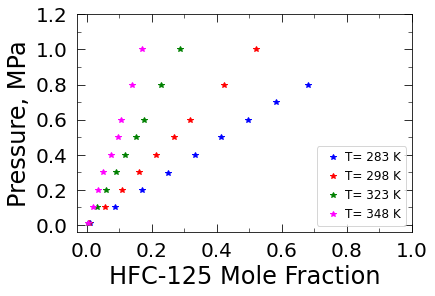

In [4]:
fig, ax = plt.subplots()

ax.plot(data_full["x_R125"][:9],data_full["pressure"][:9]/1e6,"*",color='blue',label="T= 283 K")
ax.plot(data_full["x_R125"][9:18],data_full["pressure"][9:18]/1e6,"*",color='red',label="T= 298 K")
ax.plot(data_full["x_R125"][18:27],data_full["pressure"][18:27]/1e6,"*",color='green',label="T= 323 K")
ax.plot(data_full["x_R125"][27:],data_full["pressure"][27:]/1e6,"*",color='magenta',label="T= 348 K")

# plt.title('Isotherm R32-[emim][TF2N]')
ax.set_ylabel('Pressure, MPa',fontsize=24)
ax.set_xlabel('HFC-125 Mole Fraction',fontsize=24)

ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9],minor=True)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
ax.set_yticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1],minor=True)

ax.tick_params("both", direction="in", which="both", length=4, labelsize=20, pad=10)
ax.tick_params("both", which="major", length=8)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.legend(fontsize=12, handletextpad=0.00, loc="lower right")#, bbox_to_anchor=(1, 0.5))
# fig.savefig('R32-emimTF2N-data.pdf',bbox_inches='tight')
plt.show()

## Load Configuration + Check DOF

In [5]:
from hfc125_emimtf2n_SRK import configuration 

In [6]:
m = ConcreteModel()
m.fs = FlowsheetBlock(default={"dynamic": False})
m.fs.properties = GenericParameterBlock(default=configuration)
m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})
DOF_initial = degrees_of_freedom(m)
print('The initial DOF is {0}'.format(DOF_initial))

The initial DOF is 7


## Fit Parameters

In [ ]:
kappa1 = np.linspace(-0.5,0.5,20)
kappa2 = np.linspace(-0.5,0.5,20)

for i in kappa1:
    for j in kappa2:
        print("trying i:",i)
        print("trying j:",j)
        try:
            parameters, obj_value, a = constant(data_subset, configuration, 'R125', 'emimTf2N', "x_R125", "x_emimTf2N", 
    init_temp =  298.15, init_press =   399400 , init_x_c1 =    0.417, init_x_c2 = 0.583,
    init_kappa_A_2_1 = i, init_kappa_A_1_2 = j, eps = 0.1, scaling_fac = 1e-9 , read=False)
        except:
            parameters = np.nan

In [7]:
parameters, obj_value, a = constant(data_subset, configuration, 'R125', 'emimTf2N', "x_R125", "x_emimTf2N", 
    init_temp =  298.15, init_press =   399400 , init_x_c1 =    0.417, init_x_c2 = 0.583,
    init_kappa_A_2_1 = -0.001, init_kappa_A_1_2 = -0.001, eps = 0.1, scaling_fac = 1e-9 , read=False)

2022-04-05 16:30:16 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-05 16:30:17 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-05 16:30:17 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-05 16:30:17 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-05 16:30:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-05 16:30:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-05 16:30:18 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-05 16:30:19 [INFO] idaes.init.fs.state_block: Property package initialization: optimal - Optimal Solution Found.
2022-04-05 16:30:19 [INFO] idaes

/Users/bridgettebefort/opt/anaconda3/envs/idaes-pse-dev/lib/python3.9/site-packages/pyomo/contrib/interior_point/interface.py:418: RuntimeWarning: divide by zero encountered in true_divide
  data = (duals_primals_lb/(primals - self._nlp.primals_lb()) +


In [8]:
print('Objective (SSE):',obj_value)

Objective (SSE): 0.13315826434076808


In [9]:
cov = np.array(a)
print('Covariance Matrix:')
print(cov)

Covariance Matrix:
[[4.95345586e-05 3.99688598e-06]
 [3.99688598e-06 5.26280133e-07]]


In [10]:
np.savetxt('Data/Covariance/SRK_Cov_2parameter.csv',cov,delimiter=',')

## Apply Parameters + Plot

In [11]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [12]:
m = ConcreteModel()

m.fs = FlowsheetBlock(default={"dynamic": False})

m.fs.properties = GenericParameterBlock(default=configuration)

m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m.fs.F101.inlet.flow_mol.fix(1)
m.fs.F101.inlet.temperature.fix(323.15)
m.fs.F101.inlet.pressure.fix(399800)
m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.5)

m.fs.properties.SRK_kappa_A['R125','emimTf2N'] = parameters['fs.properties.SRK_kappa_A[R125,emimTf2N]']
m.fs.properties.SRK_kappa_A['emimTf2N','R125'] = parameters['fs.properties.SRK_kappa_A[emimTf2N,R125]']

# Initialize the flash unit
m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

# Fix the state variables on the state block
# m.fs.F101.inlet.pressure.unfix()
m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

R125_x = np.zeros((len(data_full)))
P = np.zeros((len(data_full)))

m.fs.liq = Param(mutable=True,default=0.040)
m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

for i in range(len(data_full)):
    m.fs.liq = data_full["x_emimTf2N"].iloc[i]
    m.fs.F101.inlet.temperature.fix(float(data_full["temperature"].iloc[i]))
    m.fs.F101.inlet.pressure.fix(float(data_full["pressure"].iloc[i]))
    m.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(float(data_full["x_R125"].iloc[i])+0.1)
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data_full["x_R125"].iloc[i]+0.1)))
    m.fs.F101.vap_outlet.temperature.fix(float(data_full["temperature"].iloc[i]))
    
#     DOF_final = degrees_of_freedom(m)
#     print("The final DOF is {0}".format(DOF_final))
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
    
    status = solver.solve(m, tee = False)

#     m.fs.F101.report()
    if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
        print(data_full["x_emimTf2N"].iloc[i])
        R125_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R125']) 
        P[i] = value(m.fs.F101.vap_outlet.pressure[0])

    else:
        print('Infeasible.')

0.992
0.915
0.832
0.75
0.669
0.587
0.504
0.417
0.319
0.994
0.945
0.891
0.839
0.787
0.733
0.683
0.578
0.479
0.996
0.97
0.941
0.912
0.883
0.848
0.824
0.772
0.715
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
Infeasible.
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.13.2\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
Infeasible.
0.966
0.95
0.926
0.903
0.895
0.86
0.829


In [13]:
fitted_data = pd.DataFrame(data=[R125_x,P/1e6])
fitted_data = fitted_data.T
fitted_data.columns = ['R125_x','P, MPa']
fitted_data.to_csv('Data/Fits/SRK_FittedData_2parameter.csv')

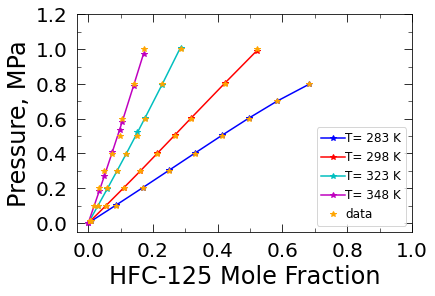

In [14]:
P1= np.zeros((len(P)))

for i in range(len(P)):
    P1[i] = P[i]/1e6

fig, ax = plt.subplots()

ax.plot(R125_x[0:9],P1[0:9],"b*-",label="T= 283 K")  
ax.plot(R125_x[9:18],P1[9:18],"r*-",label="T= 298 K") 
ax.plot(R125_x[18:27],P1[18:27],"c*-",label="T= 323 K") 
ax.plot(R125_x[27:],P1[27:],"m-*",label="T= 348 K")
ax.plot(data_full["x_R125"],data_full["pressure"]/1e6,"*",color='orange',label="data")  

# plt.title('Isotherm R32-[emim][TF2N]')
ax.set_ylabel('Pressure, MPa',fontsize=24)
ax.set_xlabel('HFC-125 Mole Fraction',fontsize=24)

ax.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9],minor=True)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2])
ax.set_yticks([0.1, 0.3, 0.5, 0.7, 0.9, 1.1],minor=True)

ax.tick_params("both", direction="in", which="both", length=4, labelsize=20, pad=10)
ax.tick_params("both", which="major", length=8)
ax.xaxis.set_ticks_position("both")
ax.yaxis.set_ticks_position("both")

ax.legend(fontsize=12, handletextpad=0.00, loc="lower right")#, bbox_to_anchor=(1, 0.5))
# fig.savefig('R32-emimTF2N-noTdep.pdf',bbox_inches='tight')
plt.show()

In [ ]:
def make_ellipse(mu, cov, ci=0.95):
    e, v = np.linalg.eig(cov)
  
    alpha = np.arctan(v[0,1]/v[0,0])
    angle = -alpha*180/np.pi 
    q = stats.chi2(2).ppf(ci)
    e = Ellipse(mu, 2*np.sqrt(q*e[0]), 2*np.sqrt(q*e[1]), angle=angle)
    return e

In [ ]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14

mu = parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'], parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']

e = make_ellipse(mu, cov, ci=0.95)

e.set_alpha(0.25)
e.set_facecolor('black')
e.set_zorder(10)

ax = plt.subplot()

ax.add_artist(e)
ax.scatter(parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'],parameters['fs.properties.PR_kappa_A[emimTf2N,R32]'],c='black',label='Reported Parameter Values')

# plt.title('95% confidence ellipse')
plt.xlabel("$\kappa_{21}$")
plt.ylabel("$\kappa_{12}$")

# patch = mpatches.Patch(color='blue', label='Frequentist approach',alpha=1)

# plt.legend(handles=[patch])
plt.legend()
ax.set(xlim=[-0.021, -0.02], ylim=[-0.03, -0.028])
# plt.savefig('R32_hmimCl_ellipse.png')
plt.show()

In [ ]:
## Why is the covariance matrix not printing on plot??

### Print Eigvals, Eigvectors of Covariance

An identifiability analysis can be performed with these as well as a FIM because the covariance matrix is the inverse of the FIM. That means that if there are any eigvals >> 0, their eigvecs indicate directions of un-identifiability.

In [15]:
eigvals, eigvecs = np.linalg.eig(cov)

In [16]:
eigvals

array([4.98583862e-05, 2.02452532e-07])

In [17]:
eigvecs

array([[ 0.99673395, -0.08075536],
       [ 0.08075536,  0.99673395]])

In [18]:
np.savetxt('Data/EigenAnalysis/SRK_vals_2parameter.csv',eigvals,delimiter=',')
np.savetxt('Data/EigenAnalysis/SRK_vecs_2parameter.csv',eigvecs,delimiter=',')

Conclusion: Fully identifiable because all eigvals ~ 0 

## FIM with Enthalpy of Vaporization (and Pressure)

### Step 1: Perturb Parameters, Calculate Enthalpy of Vaporization

1. Perturb Parameters: stepsize = 0.001

2. Holding all other parameters constant, calculate new pressure predictions at different temps, compositions 

*T = (T1=298, T2=323)

*x = (0.01,0.2,0.325,0.4)

*Pguess comes from data_full

3. Save P, Use Clausius Clapeyron to calculate enthvap

In [ ]:
h = 0.001
kR32_emimTF2N_plus = parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'] + h
kR32_emimTF2N_minus = parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'] - h
kemimTF2N_R32_plus = parameters['fs.properties.PR_kappa_A[emimTf2N,R32]'] + h
kemimTF2N_R32_minus = parameters['fs.properties.PR_kappa_A[emimTf2N,R32]'] - h

In [ ]:
data = np.array([[kR32_emimTF2N_plus,parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']],
                [kR32_emimTF2N_minus,parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']],
                [parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'],kemimTF2N_R32_plus],
               [parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'],kemimTF2N_R32_minus]])

In [ ]:
perturbed_params = pd.DataFrame(data=data,columns=['kR32_emimTF2N','kemimTF2N_R32'])
perturbed_params

In [ ]:
x = [0.01,0.2,0.325,0.4]
temps_298 = [298.15,298.15,298.15,298.15]
pguess_298 = [9600,250000,399400,549000]
temps_323 = [323.15,323.15,323.15,323.15]
pguess_323 = [20400,400100,700300,1000000]

In [ ]:
test_298 = pd.DataFrame()
test_298['temperature'] = temps_298
test_298['pressure'] = pguess_298
test_298['x_R32'] = x
test_298['x_emimTf2N'] = 1-test_298['x_R32']
# test_298

In [ ]:
test_323 = pd.DataFrame()
test_323['temperature'] = temps_323
test_323['pressure'] = pguess_323
test_323['x_R32'] = x
test_323['x_emimTf2N'] = 1-test_323['x_R32']
# test_323

In [ ]:
test_data = pd.concat([test_298,test_323],ignore_index=True)

In [ ]:
# Loop through test values

R32_x = np.zeros((len(perturbed_params),len(test_data)))
P = np.zeros((len(perturbed_params),len(test_data)))

for j in range(len(perturbed_params)):

    m = ConcreteModel()

    m.fs = FlowsheetBlock(default={"dynamic": False})

    m.fs.properties = GenericParameterBlock(default=configuration)

    m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                               "has_heat_transfer": True,
                               "has_pressure_change": True})

    m.fs.F101.inlet.flow_mol.fix(1)
    m.fs.F101.inlet.temperature.fix(323.15)
    m.fs.F101.inlet.pressure.fix(399800)
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

    m.fs.properties.PR_kappa_A['R32','emimTf2N'] = perturbed_params['kR32_emimTF2N'][j]
    m.fs.properties.PR_kappa_A['emimTf2N','R32'] = perturbed_params['kemimTF2N_R32'][j]

    # Initialize the flash unit
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

    # Fix the state variables on the state block
    # m.fs.F101.inlet.pressure.unfix()
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

    m.fs.liq = Param(mutable=True,default=0.040)
    m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

    for i in range(len(test_data)):
        m.fs.liq = test_data["x_emimTf2N"].iloc[i]
        m.fs.F101.inlet.temperature.fix(float(test_data["temperature"].iloc[i]))
        m.fs.F101.inlet.pressure.fix(float(test_data["pressure"].iloc[i]))
        m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(test_data["x_R32"].iloc[i])+0.1)
        m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(test_data["x_R32"].iloc[i]+0.1)))
        m.fs.F101.vap_outlet.temperature.fix(float(test_data["temperature"].iloc[i]))

    #     DOF_final = degrees_of_freedom(m)
    #     print("The final DOF is {0}".format(DOF_final))
        m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

        status = solver.solve(m, tee = False)

    #     m.fs.F101.report()
        if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
            print(test_data["x_emimTf2N"].iloc[i])
            R32_x[j,i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32'])
            P[j,i] = value(m.fs.F101.vap_outlet.pressure[0])

        else:
            print('Infeasible.')

In [ ]:
test_data['P_kR32_emimTF2N_plus'] = P[0]
test_data['P_kR32_emimTF2N_minus'] = P[1]
test_data['P_kemimTF2N_R32_plus'] = P[2]
test_data['P_kemimTF2N_R32_minus'] = P[3]

In [ ]:
grad_P = test_data

In [ ]:
test_data_298 = test_data[test_data['temperature']==298.15]
test_data_323 = test_data[test_data['temperature']==323.15].reset_index()

In [ ]:
R = 8.314 #J/mol-K
hvap_calc_kR32_emimTF2N_plus = []
for i in range(len(x)):
    T2 = test_data_323['temperature'][i]
    T1 = test_data_298['temperature'][i]
    P2 = test_data_323['P_kR32_emimTF2N_plus'][i]
    P1 = test_data_298['P_kR32_emimTF2N_plus'][i]
    hvap_calc_kR32_emimTF2N_plus.append(np.log(P2/P1)*R/(1/T2-1/T1))

hvap_calc_kR32_emimTF2N_minus = []
for i in range(len(x)):
    T2 = test_data_323['temperature'][i]
    T1 = test_data_298['temperature'][i]
    P2 = test_data_323['P_kR32_emimTF2N_minus'][i]
    P1 = test_data_298['P_kR32_emimTF2N_minus'][i]
    hvap_calc_kR32_emimTF2N_minus.append(np.log(P2/P1)*R/(1/T2-1/T1))
    
hvap_calc_kemimTF2N_R32_plus = []
for i in range(len(x)):
    T2 = test_data_323['temperature'][i]
    T1 = test_data_298['temperature'][i]
    P2 = test_data_323['P_kemimTF2N_R32_plus'][i]
    P1 = test_data_298['P_kemimTF2N_R32_plus'][i]
    hvap_calc_kemimTF2N_R32_plus.append(np.log(P2/P1)*R/(1/T2-1/T1))
    
hvap_calc_kemimTF2N_R32_minus = []
for i in range(len(x)):
    T2 = test_data_323['temperature'][i]
    T1 = test_data_298['temperature'][i]
    P2 = test_data_323['P_kemimTF2N_R32_minus'][i]
    P1 = test_data_298['P_kemimTF2N_R32_minus'][i]
    hvap_calc_kemimTF2N_R32_minus.append(np.log(P2/P1)*R/(1/T2-1/T1))

In [ ]:
hvap = pd.DataFrame()
hvap['x_R32'] = x
hvap['hvap_kR32_emimTF2N_plus'] = hvap_calc_kR32_emimTF2N_plus
hvap['hvap_kR32_emimTF2N_minus'] = hvap_calc_kR32_emimTF2N_minus
hvap['hvap_kemimTF2N_R32_plus'] = hvap_calc_kemimTF2N_R32_plus
hvap['hvap_kemimTF2N_R32_minus'] = hvap_calc_kemimTF2N_R32_minus

In [ ]:
hvap

### Step 2: Calculate Gradient wrt each param at each concentration

In [ ]:
grad_kR32_emimTF2N = (hvap['hvap_kR32_emimTF2N_plus'] - hvap['hvap_kR32_emimTF2N_minus'])/(2*h)
grad_kemimTF2N_R32 = (hvap['hvap_kemimTF2N_R32_plus'] - hvap['hvap_kemimTF2N_R32_minus'])/(2*h)

In [ ]:
grad_P['kR32_emimTF2N'] = (grad_P['P_kR32_emimTF2N_plus'] - grad_P['P_kR32_emimTF2N_minus'])/(2*h)
grad_P['kemimTF2N_R32'] = (grad_P['P_kemimTF2N_R32_plus'] - grad_P['P_kemimTF2N_R32_minus'])/(2*h)

### Step 3: Build Jacobian and FIM

Rows: enthvap @ 4 concentrations; or pressure @ 4 concentrations, 2 temperatures

Columns: parameters (2)

In [ ]:
J_df = pd.DataFrame()
J_df['kR32_emimTF2N'] = grad_kR32_emimTF2N
J_df['kemimTF2N_R32'] = grad_kemimTF2N_R32

In [ ]:
J = J_df.to_numpy()
Jtrans = np.transpose(J)

In [ ]:
FIM = np.dot(Jtrans,J)

In [ ]:
FIM

In [ ]:
J_df_P = pd.DataFrame()
J_df_P['kR32_emimTF2N'] = grad_P['kR32_emimTF2N']
J_df_P['kemimTF2N_R32'] = grad_P['kemimTF2N_R32']

In [ ]:
J_P = J_df_P.to_numpy()
J_Ptrans = np.transpose(J_P)

In [ ]:
FIM_P = np.dot(J_Ptrans,J_P)

In [ ]:
FIM_P

### Step 4: Find Eigenvalues, Eigenvectors

**Enthalpy of Vaporization**

In [ ]:
eigvals, eigvecs = np.linalg.eig(FIM)

In [ ]:
eigvals

In [ ]:
eigvecs

All eigenvalues >> 0, assuming that these 2 parameters are identifiable with the given T, x, P data

**Pressure**

In [ ]:
eigvals_P, eigvecs_P = np.linalg.eig(FIM_P)

In [ ]:
eigvals_P

In [ ]:
eigvecs_P

All eigvals >> 0, assuming these 2 parameters are identifiable with the given T, x, P data

## AIC Value

See https://docs.google.com/document/d/1um0r2XK4ldjjy2colOqaZsEM3wIzGD6l_3B8gnpnI2I/edit# for equations

### Calculate MLE

In [ ]:
### Define calc model P function

def calcPmod(theta,data):
    '''
    Arguments:
    theta - list of BIPs
    data - data needed to run the model
    
    Returns
    Pmod - list of calculated pressures
    '''
    
    m = ConcreteModel()

    m.fs = FlowsheetBlock(default={"dynamic": False})

    m.fs.properties = GenericParameterBlock(default=configuration)

    m.fs.F101 = Flash(default={"property_package": m.fs.properties,
                               "has_heat_transfer": True,
                               "has_pressure_change": True})

    m.fs.F101.inlet.flow_mol.fix(1)
    m.fs.F101.inlet.temperature.fix(323.15)
    m.fs.F101.inlet.pressure.fix(399800)
    m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.5)

    m.fs.properties.PR_kappa_A['R32','emimTf2N'] = theta[0]
    m.fs.properties.PR_kappa_A['emimTf2N','R32'] = theta[1]

    # Initialize the flash unit
    m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

    # Fix the state variables on the state block
    # m.fs.F101.inlet.pressure.unfix()
    m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].unfix()

    R32_x = np.zeros((len(data)))
    P = np.zeros((len(data)))

    m.fs.liq = Param(mutable=True,default=0.040)
    m.fs.liquid = Constraint(expr=m.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"] == m.fs.liq)

    for i in range(len(data)):
        m.fs.liq = data["x_emimTf2N"].iloc[i]
        m.fs.F101.inlet.temperature.fix(float(data["temperature"].iloc[i]))
        m.fs.F101.inlet.pressure.fix(float(data["pressure"].iloc[i]))
        m.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(float(data["x_R32"].iloc[i])+0.1)
        m.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(float(1-(data["x_R32"].iloc[i]+0.1)))
        m.fs.F101.vap_outlet.temperature.fix(float(data["temperature"].iloc[i]))

    #     DOF_final = degrees_of_freedom(m)
    #     print("The final DOF is {0}".format(DOF_final))
        m.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

        status = solver.solve(m, tee = False)

    #     m.fs.F101.report()
        if (status.solver.status == SolverStatus.ok) and (status.solver.termination_condition == TerminationCondition.optimal):
#             print(data["x_emimTf2N"].iloc[i])
            R32_x[i] = value(m.fs.F101.liq_outlet.mole_frac_comp[0,'R32']) 
            P[i] = value(m.fs.F101.vap_outlet.pressure[0])

        else:
            print('Infeasible.')
            
    Pmod = P
    
    return Pmod

In [ ]:
### Define function to calculate residual
def res(theta,data,Pexp):
    '''
    Arguments:
    theta - list of BIPs
    data - data needed to run the model
    Pexp - list of experimental pressure data
    
    Returns:
    residual between model and exp (note, this will be large because of units of P)
    '''
    
    #Calculate model P
    Pmod = calcPmod(theta,data)
    
    return Pexp - Pmod

In [ ]:
theta_guess = [parameters['fs.properties.PR_kappa_A[R32,emimTf2N]'],parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']]
Pexp = data_subset['pressure'].values.tolist()
n = 2
bnds = ([-20,-20],[20,20])

In [ ]:
# theta0 = [-0.05,-0.04,-0.03,-0.02,-0.01,-0.001]
# restest = []
# for i in range(len(theta0)):
#     theta_guess = [theta0[i],parameters['fs.properties.PR_kappa_A[emimTf2N,R32]']]
#     restest.append(res(theta_guess,data_subset,Pexp,n))
    
# plt.plot(theta0,restest)
# plt.show()

In [ ]:
### solve
sol = scipy.optimize.least_squares(res, theta_guess, method='trf', args=(data_subset,Pexp),bounds=bnds)

In [ ]:
theta_hat = sol.x
theta_hat

In [ ]:
def SSR(theta,data,Pexp):
    '''
    Arguments:
    theta - list of BIPs
    data - data needed to run the model
    Pexp - list of experimental pressure data
    
    Returns:
    SSR - sum of residuals squared
    '''
    
    #Calculate model P
    Pmod = calcPmod(theta,data)
    
    #Calculate residual squared
    res = (Pexp - Pmod)**2
    
    #Sum residuals squared
    SSR = np.sum(res)
    
    return SSR

In [ ]:
SSR = SSR(theta_hat,data_subset,Pexp)
SSR

In [ ]:
sigma_sq = SSR/n
sigma_sq

In [ ]:
L = -n/2*np.log(2*np.pi) - n/2*np.log(sigma_sq) - 1/(2*sigma_sq)*SSR
L

In [ ]:
AIC = 2*n - 2*L
AIC

Other AIC - using SSR calculated in above parameter fitting

In [19]:
n = 2

In [20]:
SSR_other = obj_value

In [21]:
sigma_sq_other = SSR_other/n
sigma_sq_other

0.06657913217038404

In [22]:
L_other = -n/2*np.log(2*np.pi) - n/2*np.log(sigma_sq_other) - 1/(2*sigma_sq_other)*SSR_other
L_other

-0.1285129851001936

In [23]:
AIC_other = 2*n - 2*L_other
AIC_other

4.257025970200387

In [24]:
AIC_data = pd.DataFrame(data=[n,obj_value,AIC_other])
AIC_data = AIC_data.T
AIC_data.columns = ['n','Objective, Pa^2','AIC']
AIC_data.to_csv('Data/AIC/SRK_AIC_2parameter.csv')